In [1]:
import pandas as pd
import tweepy
import matplotlib.pyplot as plt

In [2]:
# Autenticação

bearer_token = 'AAAAAAAAAAAAAAAAAAAAAI9HhwEAAAAAmCreagjppAVB%2FFx7qukVBZa%2Fu%2BM%3DlpIBPzDULv07PbAPMBWB7LtQwapeNqWAfGwtggQ6RsMMg0fuYw'
client = tweepy.Client(bearer_token)

In [3]:
# Recuperando os Tweets

response = client.search_recent_tweets("Eleições2022 -#SOSBrasil", max_results=100)

In [4]:
# Imprimindo os tweets

tweets = response.data

for tweet in tweets:
    print(tweet.text)

RT @siteptbr: 🚨 URGENTE: Bolsonaro acaba de chamar todo o Nordeste de analfabetos e diz que as altas taxas de analfabetismo são culpas do P…
RT @siteptbr: 🚨 URGENTE: Bolsonaro acaba de chamar todo o Nordeste de analfabetos e diz que as altas taxas de analfabetismo são culpas do P…
RT @siteptbr: 🚨 URGENTE: Bolsonaro acaba de chamar todo o Nordeste de analfabetos e diz que as altas taxas de analfabetismo são culpas do P…
RT @siteptbr: 🚨 URGENTE: Bolsonaro acaba de chamar todo o Nordeste de analfabetos e diz que as altas taxas de analfabetismo são culpas do P…
RT @updatecharts: Simone: “Peço desculpas aos que imploraram neutralidade (...) O que está em jogo é maior do que cada um de nós.” #Eleiçõe…
RT @siteptbr: É FAKE! Bolsonaristas estão espalhando FALSAS publicações de Lula, afirmando que ele irá fechar as igrejas e obrigar a todos…
RT @dannysthilld: EU NÃO AGUENTO MAIS,esse governo do Bozo!
Eu sou Lula !!
É 13
GIGANTE
Lula 51%
#Vote13
#LulaNoSegundoTurno 
#LulaPresiden…
RT @siteptbr: 

In [5]:
# Agrupando os tweets em um dataframe
tweets_list = [[tweet.text] for tweet in tweets]
df = pd.DataFrame(tweets_list, columns=['Texto'])
pd.options.display.max_colwidth = 130
df.head()

,Texto
0,RT @siteptbr: 🚨 URGENTE: Bolsonaro acaba de chamar todo o Nordeste de analfabetos e diz que as altas taxas de analfabetismo sã...
1,RT @siteptbr: 🚨 URGENTE: Bolsonaro acaba de chamar todo o Nordeste de analfabetos e diz que as altas taxas de analfabetismo sã...
2,RT @siteptbr: 🚨 URGENTE: Bolsonaro acaba de chamar todo o Nordeste de analfabetos e diz que as altas taxas de analfabetismo sã...
3,RT @siteptbr: 🚨 URGENTE: Bolsonaro acaba de chamar todo o Nordeste de analfabetos e diz que as altas taxas de analfabetismo sã...
4,RT @updatecharts: Simone: “Peço desculpas aos que imploraram neutralidade (...) O que está em jogo é maior do que cada um de n...


In [6]:
#Agrupando os tweets em uma string única

string = pd.Series(df['Texto'].values).str.cat(sep='')
string

'RT @siteptbr: 🚨 URGENTE: Bolsonaro acaba de chamar todo o Nordeste de analfabetos e diz que as altas taxas de analfabetismo são culpas do P…RT @siteptbr: 🚨 URGENTE: Bolsonaro acaba de chamar todo o Nordeste de analfabetos e diz que as altas taxas de analfabetismo são culpas do P…RT @siteptbr: 🚨 URGENTE: Bolsonaro acaba de chamar todo o Nordeste de analfabetos e diz que as altas taxas de analfabetismo são culpas do P…RT @siteptbr: 🚨 URGENTE: Bolsonaro acaba de chamar todo o Nordeste de analfabetos e diz que as altas taxas de analfabetismo são culpas do P…RT @updatecharts: Simone: “Peço desculpas aos que imploraram neutralidade (...) O que está em jogo é maior do que cada um de nós.” #Eleiçõe…RT @siteptbr: É FAKE! Bolsonaristas estão espalhando FALSAS publicações de Lula, afirmando que ele irá fechar as igrejas e obrigar a todos…RT @dannysthilld: EU NÃO AGUENTO MAIS,esse governo do Bozo!\nEu sou Lula !!\nÉ 13\nGIGANTE\nLula 51%\n#Vote13\n#LulaNoSegundoTurno \n#LulaPresiden…RT @siteptbr:

In [7]:
#Removendo caracteres especiais

caracteres = "#@"

for i in range(len(caracteres)):
    string = string.replace(caracteres[i], "")
string

'RT siteptbr: 🚨 URGENTE: Bolsonaro acaba de chamar todo o Nordeste de analfabetos e diz que as altas taxas de analfabetismo são culpas do P…RT siteptbr: 🚨 URGENTE: Bolsonaro acaba de chamar todo o Nordeste de analfabetos e diz que as altas taxas de analfabetismo são culpas do P…RT siteptbr: 🚨 URGENTE: Bolsonaro acaba de chamar todo o Nordeste de analfabetos e diz que as altas taxas de analfabetismo são culpas do P…RT siteptbr: 🚨 URGENTE: Bolsonaro acaba de chamar todo o Nordeste de analfabetos e diz que as altas taxas de analfabetismo são culpas do P…RT updatecharts: Simone: “Peço desculpas aos que imploraram neutralidade (...) O que está em jogo é maior do que cada um de nós.” Eleiçõe…RT siteptbr: É FAKE! Bolsonaristas estão espalhando FALSAS publicações de Lula, afirmando que ele irá fechar as igrejas e obrigar a todos…RT dannysthilld: EU NÃO AGUENTO MAIS,esse governo do Bozo!\nEu sou Lula !!\nÉ 13\nGIGANTE\nLula 51%\nVote13\nLulaNoSegundoTurno \nLulaPresiden…RT siteptbr: 🚨 URGENTE: 

In [9]:
#Ignorando Stopwords

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["Eleicoes2022", "Eleições2022", "RT", "por", "de", "dar", "pois", "em", "um", "da", "ser", "aqui"])

<function matplotlib.pyplot.show(close=None, block=None)>

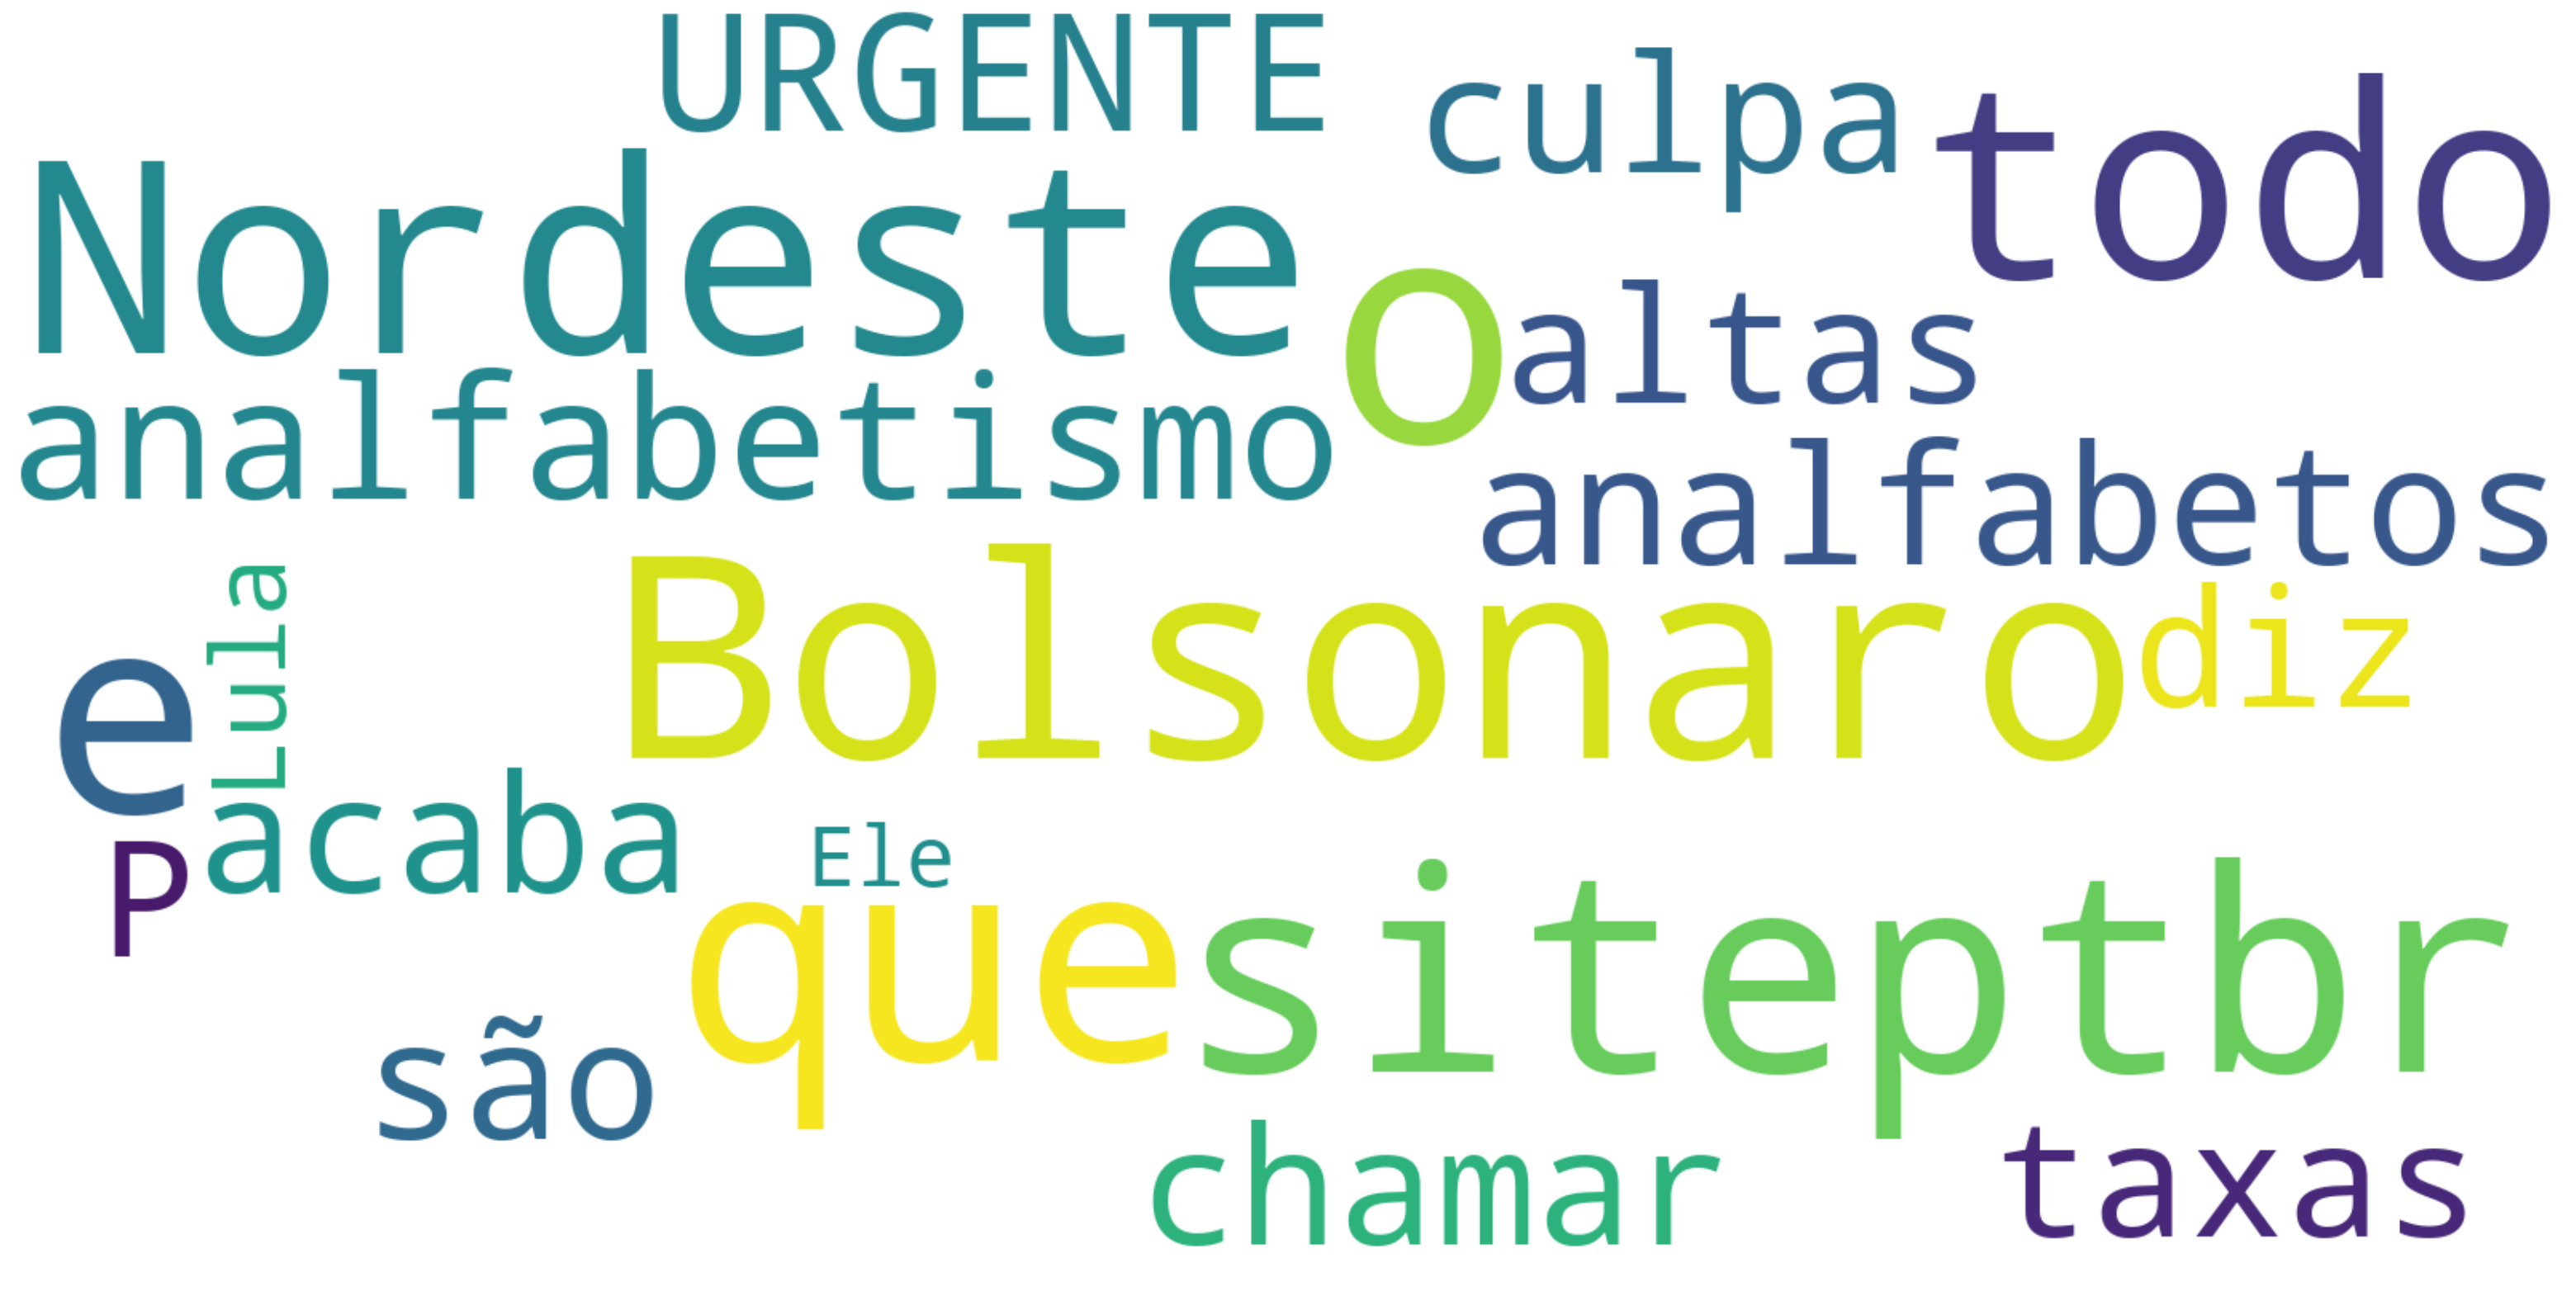

In [11]:
#Word Cloud com os textos do tweets

wordcloud = wordcloud = WordCloud(width=1600, stopwords=stopwords, height=800, max_font_size=200, max_words=20, collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show